# Data Pre-Processing

**Importing Packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv("./data/Travel.csv")
print(df.shape)
df.head()

(4888, 20)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

### Handling Missing Values

- Handling Missing Values
- Handling Duplicates
- Check Data Types
- Understand the dataset

In [3]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

- Here we consider "Fe Male" as a Female 

In [4]:
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

- since Single can be considered as Unmarried we replace Single as Unmarried

**Check Spelling mistake**

In [5]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [6]:
df['MaritalStatus'].unique()

array(['Unmarried', 'Divorced', 'Married'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,round(df[feature].isnull().mean()*100),'% missing values')

Age 5 % missing values
TypeofContact 1 % missing values
DurationOfPitch 5 % missing values
NumberOfFollowups 1 % missing values
PreferredPropertyStar 1 % missing values
NumberOfTrips 3 % missing values
NumberOfChildrenVisiting 1 % missing values
MonthlyIncome 5 % missing values


In [9]:
df[features_with_na].describe(exclude='object')

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values
- **Impute Median Value for Age column**
- **Impute Mode for Type of Contact**
- **Ipute Median for Duration of Pitch**
- **Impute Mode for NumberofFollowup as it is Discreate feature**
- **Impute Mode for PreferreredPropertyStar**
- **Impute Median for NumberofTrips**
- **Impute Mode for NumberOfChildrenVisiting**
- **Impute Median for MonthlyIncome**

In [10]:
df['Age'].fillna(df.Age.median(),inplace=True)
df['DurationOfPitch'].fillna(df.DurationOfPitch.median(),inplace=True)
df['NumberOfFollowups'].fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df['PreferredPropertyStar'].fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df['NumberOfTrips'].fillna(df.NumberOfTrips.median(),inplace=True)
df['NumberOfChildrenVisiting'].fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df['MonthlyIncome'].fillna(df.MonthlyIncome.median(),inplace=True)
df['TypeofContact'].fillna(df.TypeofContact.mode()[0],inplace=True)

## 3.2 Other Data Cleaning steps

#### Handling Duplicates

In [11]:
df.duplicated().sum()

0

**we have 0 duplicate values**

**Drop CustomerID from dataset as it cannot be used in Model Training**

**Drop Gender Column as it doesn't correlate with target variable which is ProdTaken**

In [12]:
df.drop(['CustomerID','Gender'],axis = 1,inplace = True)

In [13]:
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0


## Feature Engineering

### Feature Extraction

In [14]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [15]:
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], axis =1, inplace = True)

In [16]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## Type Of Features

**Numeric Features**

In [17]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f"No. of Numerical Features: {len(num_features)}")

No. of Numerical Features: 12


**Categorical Features**

In [18]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"No. of Categorical Features: {len(categorical_features)}")

No. of Categorical Features: 5


**Discrete Features**

In [19]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print(f"No. of Discrete Features: {len(discrete_features)}")

No. of Discrete Features: 9


**Continues Features**

In [20]:
continues_features = [feature for feature in num_features if feature not in discrete_features]
print(f"No. of Continues Features: {len(continues_features)}")

No. of Continues Features: 3


## Multicollinearity Check

**Variance Inflation Factor(VIF)**

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(provided_features, df):
    X =df[provided_features]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [22]:
compute_vif(num_features, df)

,Variable,VIF
0,ProdTaken,1.160838
1,Age,1.341054
2,CityTier,1.017752
3,DurationOfPitch,1.010338
4,NumberOfFollowups,1.176851
5,PreferredPropertyStar,1.016609
6,NumberOfTrips,1.082175
7,Passport,1.082711
8,PitchSatisfactionScore,1.012607
9,OwnCar,1.012319


## Check Outlier and Capping it

**Why outliers?**
- Data Entry Error:Human Error
- Measurement error:Instrument Error.
- Natural error:it will be real life data
- Intentional error : people give wrong inputs

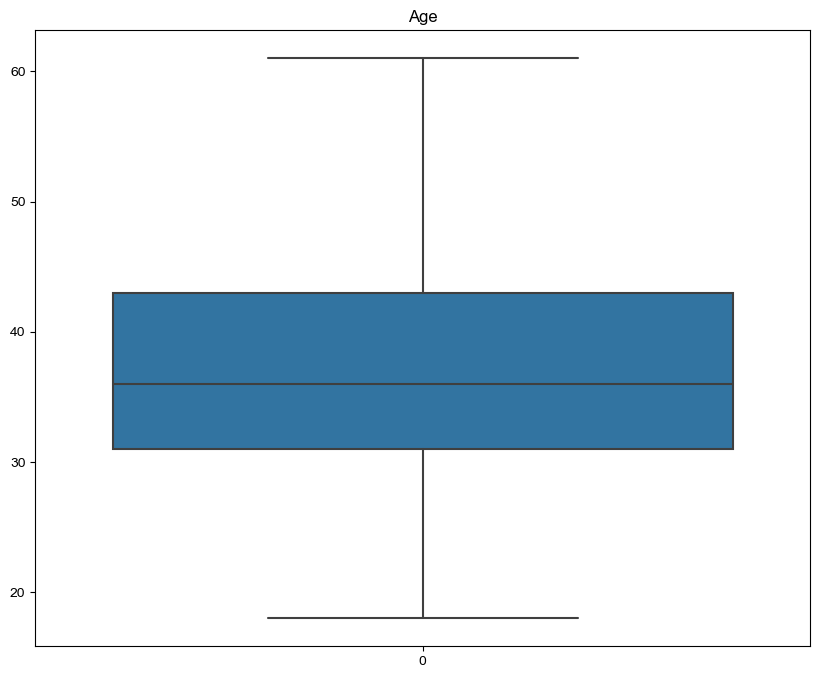

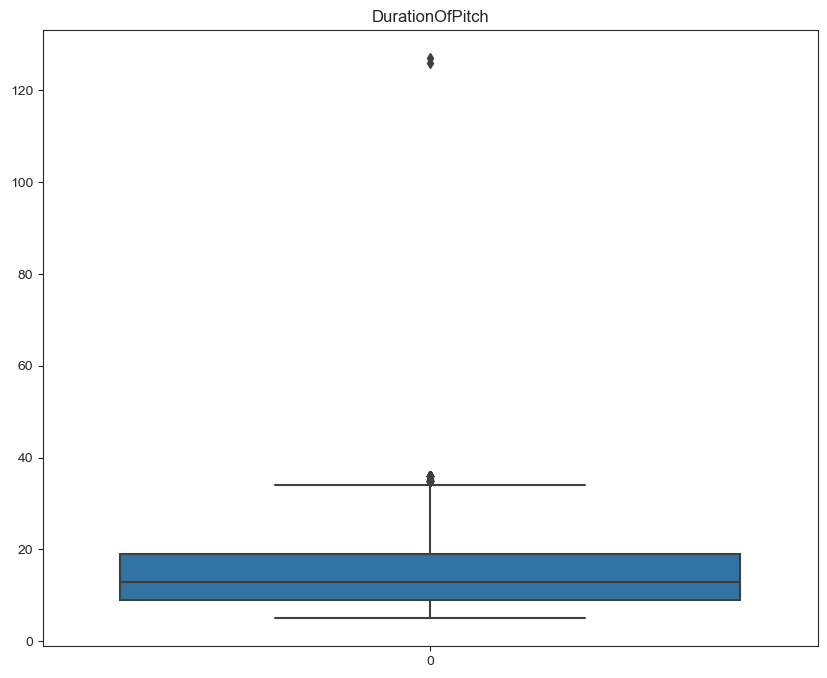

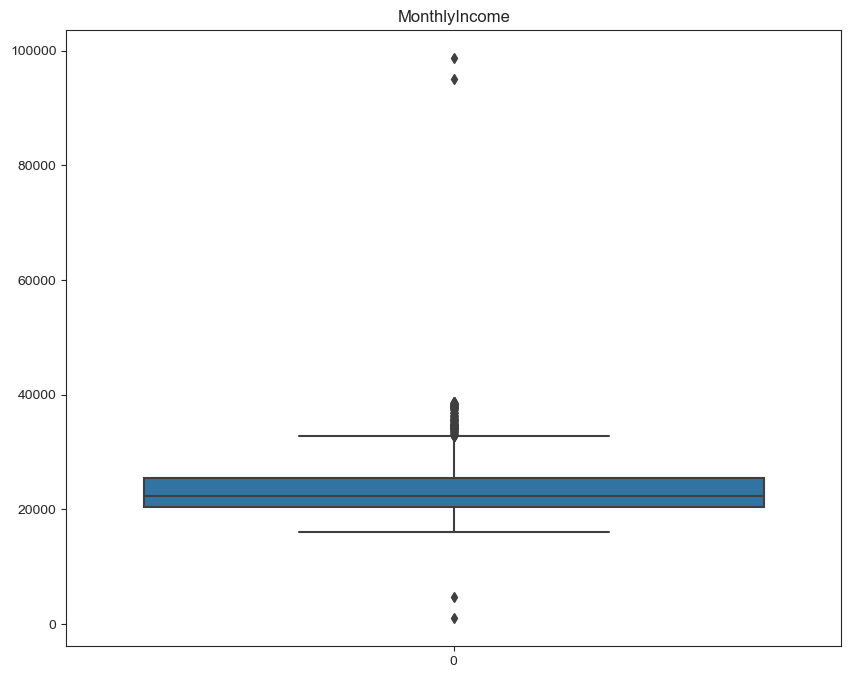

In [23]:
for i in continues_features:
    plt.figure(figsize=(10,8))
    plt.title(str(i))
    sns.set_style('ticks')
    ax = sns.boxplot(df[i])

In [28]:
def detect_outlier(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    print("\n ****",col, '****')
    print(f"Q3:{Q3} | Q1:{Q1}")
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    print('Upper Limit',UL)
    print('Lower Limit',LL)
    df.loc[(df[col]>UL), col] = UL
    df.loc[(df[col]<LL), col] = LL
    return df

In [29]:
for col in continues_features:
    detect_outlier(col)


 **** Age ****
Q3:43.0 | Q1:31.0
Upper Limit 61.0
Lower Limit 13.0

 **** DurationOfPitch ****
Q3:19.0 | Q1:9.0
Upper Limit 34.0
Lower Limit -6.0

 **** MonthlyIncome ****
Q3:25424.75 | Q1:20485.0
Upper Limit 32834.375
Lower Limit 13075.375


**Checking skewness**

In [31]:
df[continues_features].skew(axis=0, skipna=True)

Age                0.415796
DurationOfPitch    0.942638
MonthlyIncome      0.726163
dtype: float64

## Feature Transformation

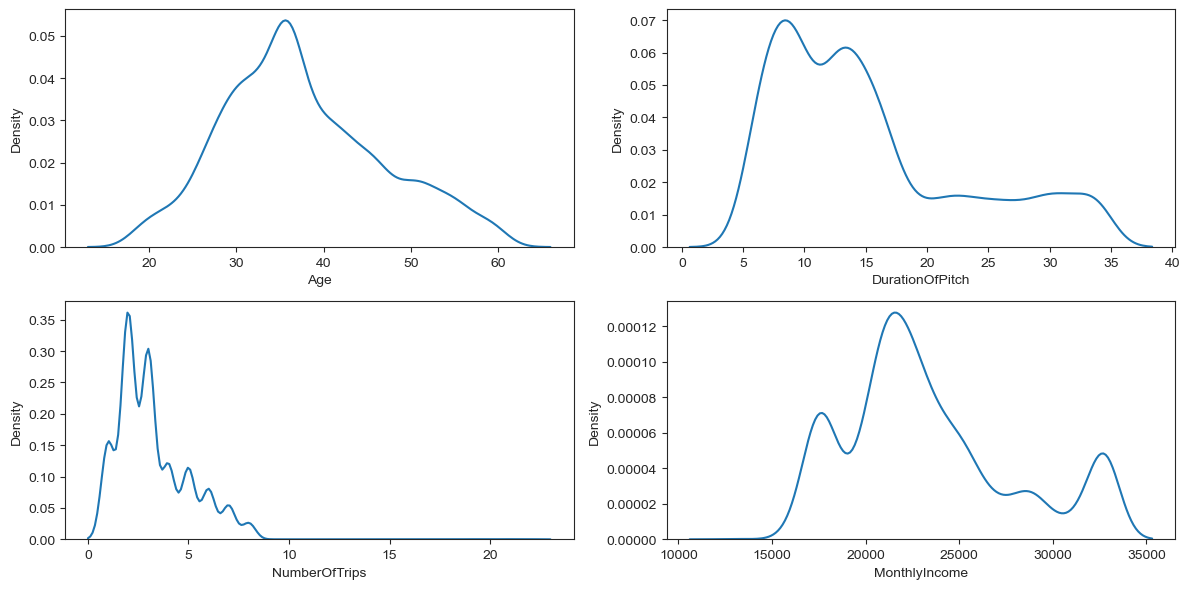

In [33]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['Age','DurationOfPitch','NumberOfTrips',"MonthlyIncome"]):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=df[col])
    plt.xlabel(col)
    plt.tight_layout()

In [35]:
# applying log Transformation
df[['DurationOfPitch','NumberOfTrips']] = df[['DurationOfPitch','NumberOfTrips']].apply(np.log1p) 

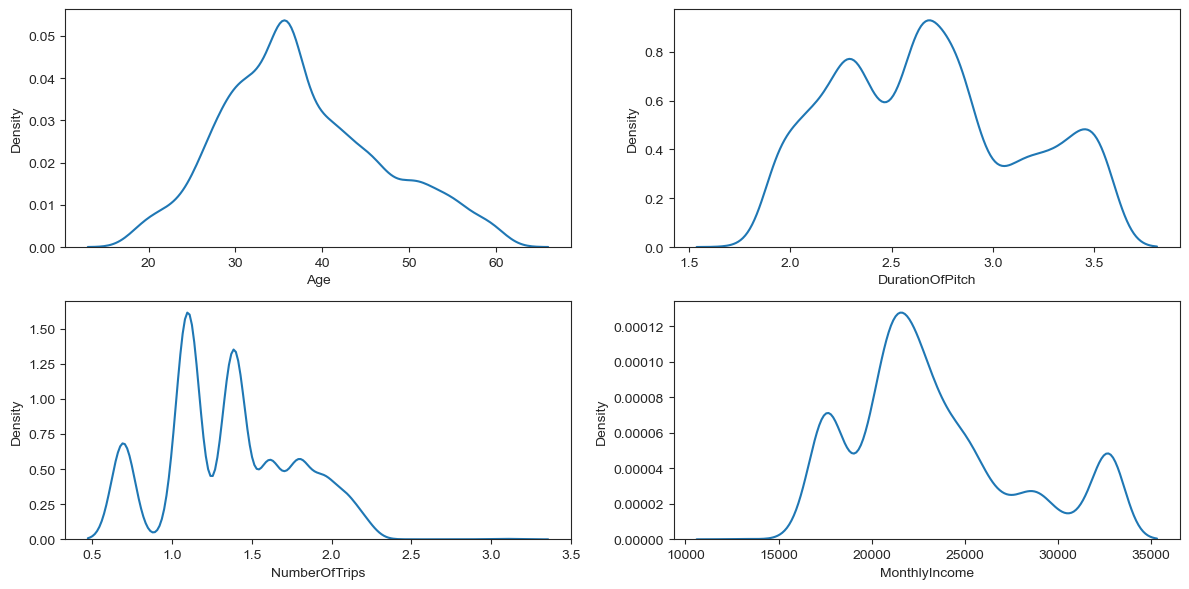

In [36]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['Age','DurationOfPitch','NumberOfTrips',"MonthlyIncome"]):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=df[col])
    plt.xlabel(col)
    plt.tight_layout()

## Split X and Y

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

* **Split dataframe to x and y**
* **Here we set a variable x for independent features and variable y for dependent features**

## Feature Encoding and Scaling

In [42]:
cat_features = X.select_dtypes('object').columns
num_features = X.select_dtypes(exclude='object').columns


In [43]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oneh_trasformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oneh_trasformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]

)

In [44]:
X = preprocessor.fit_transform(X)

In [45]:
X.shape

(4888, 25)

## Handling Imbalanced Datase
- Handling Imbalanced Target Variable

In [48]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
x_new, y_new = sm.fit_resample(X,y)

## Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6348, 25)
(1588, 25)
(6348,)
(1588,)


## Model Selection

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [58]:
models = {
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "K-Neighbors Classifier":KNeighborsClassifier(),
    "Support Vector Classifier":SVC(),
    "XGBClassifier":XGBClassifier(),
    "CatBoosting Classifier":CatBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    #test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"F1 Score:{model_train_f1:.4f}")
    print(f"precision:{model_train_precision:.4f}")
    print(f"recall:{model_train_recall:.4f}")
    print(f"Roc Auc Score:{model_train_rocauc_score:.4f}")
    
    print("-"*35)
    
    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"F1 Score:{model_test_f1:.4f}")
    print(f"precision:{model_test_precision:.4f}")
    print(f"recall:{model_test_recall:.4f}")
    print(f"Roc Auc Score:{model_test_rocauc_score:.4f}")
    
    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Score:1.0000
-----------------------------------
model performance for test set
Accuracy:0.9654
F1 Score:0.9654
precision:0.9629
recall:0.9666
Roc Auc Score:0.9654


Decision Tree
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Score:1.0000
-----------------------------------
model performance for test set
Accuracy:0.9402
F1 Score:0.9402
precision:0.9339
recall:0.9447
Roc Auc Score:0.9403


Gradient Boosting
model performance for training set
Accuracy:0.9124
F1 Score:0.9124
precision:0.9375
recall:0.8846
Roc Auc Score:0.9126
-----------------------------------
model performance for test set
Accuracy:0.8885
F1 Score:0.8884
precision:0.9100
recall:0.8573
Roc Auc Score:0.8879


AdaBoost Classifier
model performance for training set
Accuracy:0.8592
F1 Score:0.8592
precision:0.8647
recall:0.8533
Roc Auc Score:0.8592

111:	learn: 0.3260184	total: 406ms	remaining: 3.22s
112:	learn: 0.3248442	total: 410ms	remaining: 3.22s
113:	learn: 0.3233465	total: 414ms	remaining: 3.22s
114:	learn: 0.3225460	total: 418ms	remaining: 3.22s
115:	learn: 0.3209755	total: 422ms	remaining: 3.22s
116:	learn: 0.3201343	total: 426ms	remaining: 3.21s
117:	learn: 0.3190493	total: 430ms	remaining: 3.21s
118:	learn: 0.3181603	total: 433ms	remaining: 3.21s
119:	learn: 0.3171032	total: 437ms	remaining: 3.2s
120:	learn: 0.3162399	total: 440ms	remaining: 3.2s
121:	learn: 0.3147674	total: 444ms	remaining: 3.19s
122:	learn: 0.3135723	total: 447ms	remaining: 3.19s
123:	learn: 0.3128749	total: 451ms	remaining: 3.19s
124:	learn: 0.3118985	total: 454ms	remaining: 3.18s
125:	learn: 0.3109657	total: 458ms	remaining: 3.18s
126:	learn: 0.3098697	total: 462ms	remaining: 3.17s
127:	learn: 0.3088739	total: 465ms	remaining: 3.17s
128:	learn: 0.3080552	total: 469ms	remaining: 3.17s
129:	learn: 0.3068318	total: 473ms	remaining: 3.16s
130:	learn: 0.

280:	learn: 0.2200826	total: 1.02s	remaining: 2.6s
281:	learn: 0.2198642	total: 1.02s	remaining: 2.6s
282:	learn: 0.2194350	total: 1.02s	remaining: 2.6s
283:	learn: 0.2190012	total: 1.03s	remaining: 2.59s
284:	learn: 0.2187283	total: 1.03s	remaining: 2.59s
285:	learn: 0.2184352	total: 1.04s	remaining: 2.59s
286:	learn: 0.2180602	total: 1.04s	remaining: 2.58s
287:	learn: 0.2177491	total: 1.04s	remaining: 2.58s
288:	learn: 0.2174323	total: 1.05s	remaining: 2.58s
289:	learn: 0.2171995	total: 1.05s	remaining: 2.57s
290:	learn: 0.2167501	total: 1.05s	remaining: 2.57s
291:	learn: 0.2163181	total: 1.06s	remaining: 2.57s
292:	learn: 0.2158883	total: 1.06s	remaining: 2.56s
293:	learn: 0.2157269	total: 1.06s	remaining: 2.56s
294:	learn: 0.2152412	total: 1.07s	remaining: 2.56s
295:	learn: 0.2149289	total: 1.07s	remaining: 2.55s
296:	learn: 0.2145210	total: 1.08s	remaining: 2.55s
297:	learn: 0.2141737	total: 1.08s	remaining: 2.54s
298:	learn: 0.2137090	total: 1.08s	remaining: 2.54s
299:	learn: 0.2

450:	learn: 0.1672143	total: 1.63s	remaining: 1.98s
451:	learn: 0.1670796	total: 1.63s	remaining: 1.98s
452:	learn: 0.1668406	total: 1.64s	remaining: 1.97s
453:	learn: 0.1666696	total: 1.64s	remaining: 1.97s
454:	learn: 0.1664223	total: 1.64s	remaining: 1.97s
455:	learn: 0.1661487	total: 1.65s	remaining: 1.96s
456:	learn: 0.1659182	total: 1.65s	remaining: 1.96s
457:	learn: 0.1656694	total: 1.65s	remaining: 1.96s
458:	learn: 0.1654703	total: 1.66s	remaining: 1.95s
459:	learn: 0.1653005	total: 1.66s	remaining: 1.95s
460:	learn: 0.1651088	total: 1.66s	remaining: 1.95s
461:	learn: 0.1648222	total: 1.67s	remaining: 1.94s
462:	learn: 0.1646640	total: 1.67s	remaining: 1.94s
463:	learn: 0.1644936	total: 1.68s	remaining: 1.93s
464:	learn: 0.1643283	total: 1.68s	remaining: 1.93s
465:	learn: 0.1641527	total: 1.68s	remaining: 1.93s
466:	learn: 0.1639234	total: 1.69s	remaining: 1.92s
467:	learn: 0.1636688	total: 1.69s	remaining: 1.92s
468:	learn: 0.1634747	total: 1.69s	remaining: 1.92s
469:	learn: 

618:	learn: 0.1353192	total: 2.23s	remaining: 1.37s
619:	learn: 0.1351816	total: 2.23s	remaining: 1.37s
620:	learn: 0.1350718	total: 2.24s	remaining: 1.37s
621:	learn: 0.1349675	total: 2.24s	remaining: 1.36s
622:	learn: 0.1348282	total: 2.25s	remaining: 1.36s
623:	learn: 0.1347034	total: 2.25s	remaining: 1.36s
624:	learn: 0.1345069	total: 2.25s	remaining: 1.35s
625:	learn: 0.1343545	total: 2.26s	remaining: 1.35s
626:	learn: 0.1341977	total: 2.26s	remaining: 1.34s
627:	learn: 0.1340852	total: 2.27s	remaining: 1.34s
628:	learn: 0.1339271	total: 2.27s	remaining: 1.34s
629:	learn: 0.1338016	total: 2.27s	remaining: 1.33s
630:	learn: 0.1336870	total: 2.27s	remaining: 1.33s
631:	learn: 0.1335754	total: 2.28s	remaining: 1.33s
632:	learn: 0.1332639	total: 2.28s	remaining: 1.32s
633:	learn: 0.1331341	total: 2.29s	remaining: 1.32s
634:	learn: 0.1329696	total: 2.29s	remaining: 1.32s
635:	learn: 0.1328131	total: 2.29s	remaining: 1.31s
636:	learn: 0.1326804	total: 2.3s	remaining: 1.31s
637:	learn: 0

787:	learn: 0.1119609	total: 2.84s	remaining: 764ms
788:	learn: 0.1117715	total: 2.85s	remaining: 761ms
789:	learn: 0.1116302	total: 2.85s	remaining: 757ms
790:	learn: 0.1115024	total: 2.85s	remaining: 754ms
791:	learn: 0.1114325	total: 2.86s	remaining: 750ms
792:	learn: 0.1112814	total: 2.86s	remaining: 747ms
793:	learn: 0.1111906	total: 2.87s	remaining: 743ms
794:	learn: 0.1110976	total: 2.87s	remaining: 740ms
795:	learn: 0.1109803	total: 2.87s	remaining: 736ms
796:	learn: 0.1108122	total: 2.88s	remaining: 733ms
797:	learn: 0.1107670	total: 2.88s	remaining: 729ms
798:	learn: 0.1106781	total: 2.88s	remaining: 726ms
799:	learn: 0.1104924	total: 2.89s	remaining: 722ms
800:	learn: 0.1103572	total: 2.89s	remaining: 719ms
801:	learn: 0.1100719	total: 2.9s	remaining: 715ms
802:	learn: 0.1099664	total: 2.9s	remaining: 712ms
803:	learn: 0.1098995	total: 2.9s	remaining: 708ms
804:	learn: 0.1097512	total: 2.91s	remaining: 705ms
805:	learn: 0.1096362	total: 2.91s	remaining: 701ms
806:	learn: 0.1

951:	learn: 0.0928433	total: 3.45s	remaining: 174ms
952:	learn: 0.0927068	total: 3.46s	remaining: 170ms
953:	learn: 0.0926544	total: 3.46s	remaining: 167ms
954:	learn: 0.0925639	total: 3.46s	remaining: 163ms
955:	learn: 0.0924566	total: 3.47s	remaining: 160ms
956:	learn: 0.0923941	total: 3.47s	remaining: 156ms
957:	learn: 0.0923060	total: 3.48s	remaining: 152ms
958:	learn: 0.0921991	total: 3.48s	remaining: 149ms
959:	learn: 0.0920948	total: 3.48s	remaining: 145ms
960:	learn: 0.0919498	total: 3.49s	remaining: 142ms
961:	learn: 0.0918393	total: 3.49s	remaining: 138ms
962:	learn: 0.0916876	total: 3.49s	remaining: 134ms
963:	learn: 0.0916396	total: 3.5s	remaining: 131ms
964:	learn: 0.0915004	total: 3.5s	remaining: 127ms
965:	learn: 0.0913384	total: 3.5s	remaining: 123ms
966:	learn: 0.0912113	total: 3.51s	remaining: 120ms
967:	learn: 0.0911327	total: 3.51s	remaining: 116ms
968:	learn: 0.0909889	total: 3.52s	remaining: 112ms
969:	learn: 0.0908803	total: 3.52s	remaining: 109ms
970:	learn: 0.0

In [60]:
knn_params = {"n_neighbors":[2,3,10,20,40,50],
             'metric':['minkowski','manhattan']}
rf_params = {'max_depth': [5, 15, 4,6,8],
              'max_features': ['log2', 'sqrt'],
              'criterion': ['gini', 'entropy'],
             'n_estimators':[100,200,400,1000]}
xgboost_params = {"learning_rate": [0.1,0.01],
                  'n_estimators':[100,200,300],
                  "colsample_bytree":[0.5,0.8,1,0.3,0.4]}
cat_params = {"learning_rate": [0.1,0.01],
             'max_depth': [5, 15, 4,6,8]}

In [61]:
randomcv_models = [('KNN',KNeighborsClassifier(), knn_params),
                  ('RF',RandomForestClassifier(), rf_params),
                  ('XGBoost',XGBClassifier() , xgboost_params),
                  ('CatBoost',CatBoostClassifier(verbose=False), cat_params)]

In [62]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} ------------")
    print(model_param[model_name])
    

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
---------------- Best Params for KNN ------------
{'n_neighbors': 2, 'metric': 'manhattan'}
---------------- Best Params for RF ------------
{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}
---------------- Best Params for XGBoost ------------
{'n_estimators': 300, 'learning_rate': 0.1, 'colsample_bytree': 1}
---------------- Best Params for CatBoost ------------
{'max_depth': 15, 'learning_rate': 0.1}


## Retraining with Best parameters

In [66]:
models = {
    "Random Forest":RandomForestClassifier(n_estimators = 400, max_features = 'sqrt', max_depth = 15, criterion = 'gini'),
    "K-Neighbors Classifier":KNeighborsClassifier( n_neighbors = 2, metric = 'manhattan'),
    "XGBClassifier":XGBClassifier( n_estimators = 300, learning_rate = 0.1, colsample_bytree = 1),
    "CatBoosting Classifier":CatBoostClassifier(max_depth = 15, learning_rate = 0.1, verbose= False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    #test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"F1 Score:{model_train_f1:.4f}")
    print(f"precision:{model_train_precision:.4f}")
    print(f"recall:{model_train_recall:.4f}")
    print(f"Roc Auc Score:{model_train_rocauc_score:.4f}")
    
    print("-"*35)
    
    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"F1 Score:{model_test_f1:.4f}")
    print(f"precision:{model_test_precision:.4f}")
    print(f"recall:{model_test_recall:.4f}")
    print(f"Roc Auc Score:{model_test_rocauc_score:.4f}")
    
    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:0.9998
F1 Score:0.9998
precision:0.9997
recall:1.0000
Roc Auc Score:0.9998
-----------------------------------
model performance for test set
Accuracy:0.9666
F1 Score:0.9666
precision:0.9606
recall:0.9717
Roc Auc Score:0.9667


K-Neighbors Classifier
model performance for training set
Accuracy:0.9986
F1 Score:0.9986
precision:1.0000
recall:0.9972
Roc Auc Score:0.9986
-----------------------------------
model performance for test set
Accuracy:0.9817
F1 Score:0.9817
precision:0.9711
recall:0.9923
Roc Auc Score:0.9819


XGBClassifier
model performance for training set
Accuracy:0.9991
F1 Score:0.9991
precision:0.9997
recall:0.9984
Roc Auc Score:0.9991
-----------------------------------
model performance for test set
Accuracy:0.9603
F1 Score:0.9603
precision:0.9685
recall:0.9499
Roc Auc Score:0.9601


CatBoosting Classifier
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Scor

## Plot ROC AUC Curve

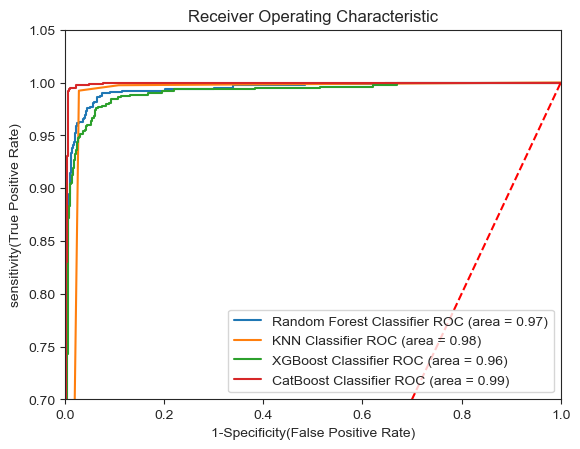

In [73]:
plt.figure()

auc_models = [
{
        'label': 'Random Forest Classifier',
        'Model' : RandomForestClassifier(n_estimators = 400, max_features = 'sqrt', max_depth = 15, criterion = 'gini'),
        'auc': 0.9667
},
{
        'label': 'KNN Classifier',
        'Model' : KNeighborsClassifier( n_neighbors = 2, metric = 'manhattan'),
        'auc': 0.9819
},
{
        'label': 'XGBoost Classifier',
        'Model' : XGBClassifier( n_estimators = 300, learning_rate = 0.1, colsample_bytree = 1),
        'auc': 0.9601
},
{
        'label': 'CatBoost Classifier',
        'Model' : CatBoostClassifier(max_depth = 15, learning_rate = 0.1, verbose= False),
        'auc': 0.9888
}
]
for algo in auc_models:
    model = algo['Model']
    model.fit(x_train,y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.7, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Cross-Validation

In [74]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state=22)

In [75]:
cat_cv_result = cross_val_score(CatBoostClassifier(max_depth = 15, learning_rate = 0.1, verbose= False),
                                x_test, y_test, cv=skfold, scoring='accuracy', n_jobs=-1)
cat_cv = cat_cv_result.mean()*100
print(f'Catboost CV Mean Accuracy Score is {cat_cv}')

Catboost CV Mean Accuracy Score is 91.68736565560067


In [76]:
knn_cv_result = cross_val_score(KNeighborsClassifier( n_neighbors = 2, metric = 'manhattan'),
                                x_test, y_test, cv=skfold, scoring='accuracy', n_jobs=-1)
knn_cv = knn_cv_result.mean()*100
print(f'KNN CV Mean Accuracy Score is {knn_cv}')                                                                                                                       

KNN CV Mean Accuracy Score is 87.0273067430937


In [78]:
rf_cv_result = cross_val_score(RandomForestClassifier(n_estimators = 400, max_features = 'sqrt', max_depth = 15, criterion = 'gini'),
                                x_test, y_test, cv=skfold, scoring='accuracy', n_jobs=-1)
rf_cv = rf_cv_result.mean()*100
print(f'RF CV Mean Accuracy Score is {rf_cv}')  

RF CV Mean Accuracy Score is 90.17594140593901


In [79]:
xb_cv_result = cross_val_score(XGBClassifier( n_estimators = 300, learning_rate = 0.1, colsample_bytree = 1),
                                x_test, y_test, cv=skfold, scoring='accuracy', n_jobs=-1)
xb_cv = xb_cv_result.mean()*100
print(f'XGBoost CV Mean Accuracy Score is {xb_cv}') 

XGBoost CV Mean Accuracy Score is 91.12132791975162


In [81]:
best_model = CatBoostClassifier(max_depth = 15, learning_rate = 0.1, verbose= False)
best_model = best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)

print("Final Model CATBOOST")
print(f"Accuracy Score Value:{score:.4f}")
print(cr)

Final Model CATBOOST
Accuracy Score Value:0.9887
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       810
           1       0.98      0.99      0.99       778

    accuracy                           0.99      1588
   macro avg       0.99      0.99      0.99      1588
weighted avg       0.99      0.99      0.99      1588



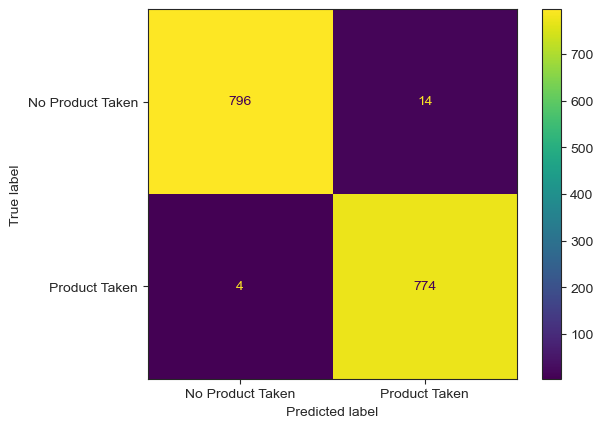

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Product Taken','Product Taken'])
disp.plot()

## Best Model is CatBoost Classifier with 98.87% Accuracy and also performed well in Cross Val

In [85]:
import pickle 
pickle.dump(best_model, open('holidaypackagemodel.pkl', 'wb'))

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pyppeteer

  Obtaining dependency information for pyppeteer from https://files.pythonhosted.org/packages/3d/ee/fb2757a38025421fd3844a0ed0a230b78c9c04a66355024436cf3005a70c/pyppeteer-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for pyee<12.0.0,>=11.0.0 from https://files.pythonhosted.org/packages/16/cc/5cea8a0a0d3deb90b5a0d39ad1a6a1ccaa40a9ea86d793eb8a49d32a6ed0/pyee-11.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for websockets<11.0,>=10.0 from https://files.pythonhosted.org/packages/27/bb/6327e8c7d4dd7d5b450b409a461be278968ce05c54da13da581ac87661db/websockets-10.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/82.9 kB ? eta -:--:--
   ---------------------------------------  81.9/82.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 82.9/82.9 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.4 kB ? eta -:--:--
   ---------------------------------------- 101.4/101.4 kB 6.1 MB